In [1]:
# Install necessary packages for GCS access and video processing
!pip install gcsfs opencv-python-headless --quiet


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
# Paths to the uploaded files
ANNOTATION_PATH = "/content/drive/MyDrive/ROADPP/road_waymo_trainval_v1.0.json"
VIDEO_PATH = "/content/drive/MyDrive/ROADPP/train_00451.mp4"


In [6]:
import json

# Load the annotation JSON
with open(ANNOTATION_PATH, 'r') as f:
    annotations = json.load(f)

# Print basic stats
print("✅ Annotations loaded!")
print("Total videos:", len(annotations["db"]))

# Sample video ID
sample_id = list(annotations["db"].keys())[0]
print("Sample video ID:", sample_id)
print("Fields:", annotations["db"][sample_id].keys())


✅ Annotations loaded!
Total videos: 798
Sample video ID: train_00407
Fields: dict_keys(['numf', 'split_ids', 'frames', 'agent_tubes', 'action_tubes', 'loc_tubes', 'duplex_tubes', 'triplet_tubes', 'av_action_tubes'])


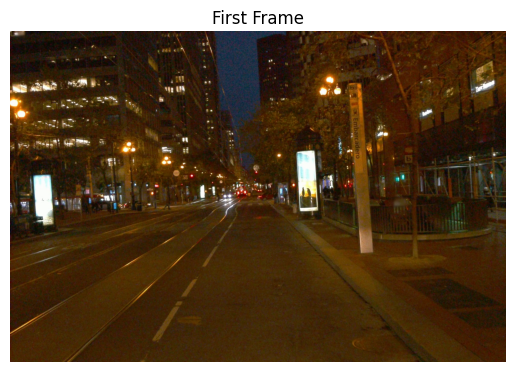

In [7]:
import cv2
import matplotlib.pyplot as plt

# Open the video
cap = cv2.VideoCapture(VIDEO_PATH)

# Read the first frame
ret, frame = cap.read()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.title("First Frame")
    plt.axis('off')
    plt.show()
else:
    print("❌ Could not read video.")
